# Introduction to Artificial Intelligence

------------  

_Authors: Jacob Koehler, Dhavide Aruliah_


## Representing and Visualizing Graphs with Python

This assignment prefaces later work with graph traversal problems. As preparation, you will cover ways to represent basic graphs and trees using base Python and then the [**networkx**](https://networkx.github.io/) library.  The main goals in this portion of the assignment are:

- to apply Python idioms for representing graphs & trees;
- to apply Python idioms for manipulating graphs & trees;
- to use Python to visualize graphs and trees;
- to apply Python for uniformed search in graphs.

<a id="questions"></a>
## Questions

+ [**Question 01: Build a Graph as a `dict`**](#q01)
+ [**Question 02: Construct & Visualize a Graph object**](#q02)
+ [**Question 03: Interrogating Graph Properties**](#q03)
+ [**Question 04: Determining Graph Connectedness**](#q04)
+ [**Question 05: Representing Network of Airports as a Graph**](#q05)
+ [**Question 06: Finding Paths in a Graph**](#q06)
+ [**Question 07: Building a Tree**](#q07)
+ [**Question 08: Using Trees for Mathematical Formulas**](#q08)
+ [**Question 09: Using a `Tree` class**](#q09)
+ [**Question 10: Traversing a Tree using In-order Traversal**](#q10)
+ [**Question 11: Finding paths between all vertices with `shortest_path`**](#q11)
+ [**Question 12: Determining a Traversal using DFS**](#q12)
+ [**Question 13: Determining Paths using DFS**](#q13)
+ [**Question 14: Determining a Traversal using BFS**](#q14)
+ [**Question 15: Determining Paths using BFS**](#q15)
+ [**Question 16: Using `networkx` for DFS and BFS**](#q16)

## Graphs in Python

In discrete mathematics, [a **graph**](https://en.wikipedia.org/wiki/Graph_(discrete_mathematics)) is a collection of *vertices* (or *nodes*) and *edges* (which are connections between vertices). Graphs are typically visualized with labelled circles for vertices and lines connecting the circles for edges.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/6n-graf.svg/440px-6n-graf.svg.png)

Notes:
+ If the edges are arrows (implying a connection *from* one vertex *to* another), the graph is a *directed graph*. Otherwise, the graph is *undirected*.
+ An edge that is goes from one vertex to itself is a *loop*
+ A graph that permits multiple edges connecting one vertex to another is a *multigraph*. For example, if the vertices represent airports, then multiple edges connecting two distinct airports would represent multiple flights between those two airports.

Graphs are ubiquitous in computer science due to their tremendous utility in applications:
+ transportation networks (e.g., roads between cities, flights between airports, etc.)
+ communication networks (e.g., physical cables between computers, wired or wireless connections between devices, etc.)
+ social networks (e.g., relationships between individuals)

A non-graphical way to represent graphs is more useful for programmatic exploration in Python (or any other programming language). One strategy is to use the *adjacency* information (i.e., how vertices are connected by edges) to describe a graph. This approach describes a graph explicitly and unambiguously in a manner suitable for manipulating programmatically.

For example, the graph displayed above has six vertices. You can describe this graph completely without a drawing by summarizing its adjacency information in a table:

| Vertex | Adjacencies |
| :------: | :-----------: |
| 1     |  2, 5    |
| 2     |  1, 5, 3 |
| 3     |  2, 4    |
| 4     |  3, 5, 6  |
| 5     |  1, 2, 4   |
|  6   |   4   |

Observe there is some redundancy in the preceding table (e.g., vertex 1 is adjacent to vertex 5 and vertex 5 is adjacent to vertex 1).

The preceding table can be represented in Python using a dictionary with vertex labels as keys and lists of adjacent vertex labels as values.

In [1]:
graph_int_labels = {
     1: [2, 5],
     2: [1, 3, 5],
     3: [2, 4],
     4: [3, 5, 6],
     5: [1, 2, 4],
     6: [4]
}

This [dictionary-based approach](https://www.python.org/doc/essays/graphs/) was suggested by Guido van Rossum, the creator of the Python language. You will use this article as a guide to write some basic algorithms for traveling around on a graph.

Usually, you don't want integer values as keys in Python dictionaries, so instead you can change to representing the graph with strings (in the case above, replacing the numerals `1` through `6` with the letters `A` through `F` respectively).

In [2]:
graph_str_labels = {
     'A': ['B', 'E'],
     'B': ['A', 'C', 'E'],
     'C': ['B', 'D'],
     'D': ['C', 'E', 'F'],
     'E': ['A', 'B', 'D'],
     'F': ['D']
}

### Plotting Graphs

[Networkx](https://networkx.github.io/) is a Python library working with graphs.
From the [`networkx` documentation]():

> NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

When using `networkx`, you can construct an object of class `networkx.classes.graph.Graph` (or `Graph` from hereon). This has the advantage that many utilities for working with graphs have been built into `networkx` for you.

If you start from a graph representation as a dictionary with lists of adjacencies, the `networkx` function `from_dict_of_lists` can construct a `Graph` object; simply pass in a dictionary of lists with the adjacency information. Once you've created the `Graph` object, you can extract information about the graph such as vertices and edges and adjacency.  You can also visualize the graph using the function `draw_networkx`.  

In [3]:
%matplotlib inline
import networkx as nx # "nx" is a conventional alias for "networkx" when importing
import pandas as pd
import warnings
warnings.filterwarnings("ignore") # To suppress matplotlib warning messages

In [4]:
G = nx.from_dict_of_lists(graph_str_labels)
print(type(G))

<class 'networkx.classes.graph.Graph'>


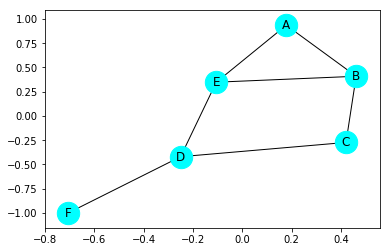

In [5]:
nx.draw_networkx(G, with_labels=True, node_color='cyan', node_size=500)
# see help(nx.draw_networkx for more optional keyword arguments)

#### Graphs from Data

Rather than constructing a graph from a dictionary, you may be using a dataset in the form of a data file (which is more useful for a graph of a reasonable size that would arise in any application).  Here, you can experiment with an example dataset from the [*Stanford Large Network Dataset Collection* on Facebook social circles](https://snap.stanford.edu/data/index.html):

Here is the description of the data from the source:


>This dataset consists of 'circles' (or 'friends lists') from Facebook. 
Facebook data was collected from survey participants using this Facebook app. The dataset includes node features (profiles), circles, and ego networks.
>
> Facebook data has been anonymized by replacing the Facebook-internal ids for each user with a new value. Also, while feature vectors from this dataset have been provided, the interpretation of those features has been obscured. For instance, where the original dataset may have contained a feature "political=Democratic Party", the new data would simply contain "political=anonymized feature 1". Thus, using the anonymized data it is possible to determine whether two users have the same political affiliations, but not what their individual political affiliations represent.

We easily read in the data using the [Pandas](https://pandas.pydata.org) function `read_csv` to produce a Pandas DataFrame. The rows of the DataFrame `facebook` created below correspond to edges in a graph (i.e., an edge connecting the node from column `A` to the node from column `B`). The DataFrame `facebook` is then in a suitable form to pass to the `networkx` function `from_pandas_edgelist` to create a `Graph` object.

In [6]:
FACEBOOK_PATH = './resource/asnlib/publicdata/facebook_combined.txt'
facebook = pd.read_csv(FACEBOOK_PATH, sep=' ', names=['A', 'B'])

In [7]:
print(facebook.info())
facebook.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88234 entries, 0 to 88233
Data columns (total 2 columns):
A    88234 non-null int64
B    88234 non-null int64
dtypes: int64(2)
memory usage: 1.3 MB
None


,A,B
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [8]:
# Construct a networkx Graph object from a Pandas DataFrame
G = nx.from_pandas_edgelist(facebook, 'A', 'B')

A `networkx` Graph object can be visualized with the `networkx` function `draw_networkx`. In the case of the Faceboook data set, this would be created as below (but you won't execute this code here because it takes a while to run for this many nodes & edges; the result is the plot shown here).

```python
nx.draw_networkx(G) # this takes a long time.
```
![](./resource/asnlib/publicdata/facebook_graph.png)

<a id="q01"></a>
[Return to top](#questions)

### Question 01: Build a Graph as a `dict`

![](./resource/asnlib/publicdata/graphh.png)

Your task here is to construct a `dict` with the strings `'A'` through `'H'` as keys (vertices) and lists of adjacent vertices as values.

+ Do *not* use a `networkx` Graph object (that construction comes in the next question).
+ Assign the resulting `dict` to `ans_1`.
+ The precise sequence of vertices in your adjacency lists is not important, as long as all adjacent vertices are listed.

In [30]:
### GRADED
### QUESTION 01:
### Construct a dictionary of lists of strings that represents
### the graph in the diagram above.
### Bind the resulting dict to the identifier ans_1.
ans_1 = {
     'A': ['B', 'H', 'G'],
     'B': ['A', 'C', 'D'],
     'C': ['B', 'D', 'E'],
     'D': ['C', 'E', 'F', 'B', 'H', 'G'],
     'E': ['C', 'F', 'D'],
     'F': ['D', 'E', 'G'],
     'G': ['D', 'F', 'H', 'A'],
     'H': ['A', 'D', 'G']
}


In [10]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id="q02"></a>
[Return to top](#questions)

### Question 02: Construct & Visualize a Graph object

You can now create a `networkx` Graph object from `ans_1` and produce a plot.
+ To do instantiate the Graph object, use the `networkx` function `from_dict_of_lists`.
+ To produce a plot, use the `networkx` function `draw_networkx` (using the `with_labels` keyword argument labels the vertices).

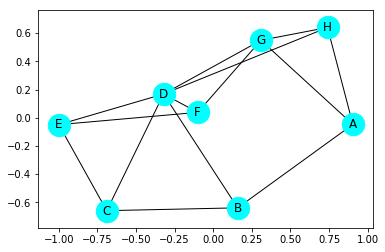

In [31]:
### GRADED
### QUESTION 02
### Create a networkx graph using ans_1 (your dictionary of lists of vertices from Question 01).
### Save this Graph object as ans_2 and use the nx.draw_networkx function to visualize it.
ans_2 = nx.from_dict_of_lists(ans_1)
# print(type(ans_2 ))
nx.draw_networkx(ans_2, with_labels=True, node_color='cyan', node_size=500)


In [14]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id="q03"></a>
[Return to top](#questions)

### Question 03: Interrogating Graph Properties

A principal reason to use `networkx` is that it has numerous functions, classes, and methods that simplify working with graphs. For instance, you can access the total number of **vertices** and **edges** in a graph object using two useful methods: `number_of_nodes` (remember, nodes is an equivalent term for *vertices* in a graph) and `number_of_edges` respectively.

+ Assign the number of vertices to `ans_3_nodes` & the number of edges to `ans_3_edges` respectively.
+ Remember, these are accessor methods so you'll invoke them as functions. Consult the [`networkx` documentation](https://networkx.github.io/documentation/stable/reference/classes/graph.html#methods) if you need to.

In [12]:
ans_2.number_of_edges()

14

In [13]:
### GRADED
### QUESTION 03
##  Determine the number of edges
## and vertices in your graph from above 
## and save the results to ans_3_edges and 
## ans_3_verts below
ans_3_edges = ans_2.number_of_edges()
ans_3_verts = ans_2.number_of_nodes()
print('The graph ans_2 has {} vertices.'.format(ans_3_verts))
print('The graph ans_2 has {} edges.'.format(ans_3_edges))

The graph ans_2 has 8 vertices.
The graph ans_2 has 14 edges.


In [17]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Paths and Graph Connectedness

Given any nonempty graph, a *path* is an ordered sequence of at least two vertices each of which is connected to its immediate predecessor by at least one edge. Think of vertices as cities in a land-locked country and think of edges as roads connecting cities; in that case, a path represents a route from one city to another (even if the two vertices are not adjacent in the graph).

Per [Wikipedia](https://en.wikipedia.org/wiki/Connectivity_(graph_theory)]), here is a definition of a *connected* graph:

>  An undirected graph is connected when it has at least one vertex and there is a path between every pair of vertices.

The graph shown here is an example of a graph that is not connected or *disconnected*; it does have three connected components.

![](./resource/asnlib/publicdata/disconnected_graph.png)

<a id="q04"></a>
[Return to top](#questions)

### Question 04: Determining Graph Connectedness

Your task here is to use `networkx` to check that the graph displayed above is not connected.

+ Create a `networkx` Graph object `ans_4` that corresponds to the diagram above (i.e., with nodes `A` through `G` and the same disconnected components).
+ You can invoke the function `nx.is_connected` to assess whether a graph is connected (code provided for you).

You can also use the function `nx.connected_components` to determine the nodes of the connected subgraphs if the original graph is itself not connected.

In [14]:
### GRADED
### QUESTION 04
###  Construct a disconnected networkx Graph object that corresponds
###  to the diagram above.
###  Save your graph object to ans_4 below.
###  You can test your solution with nx.is_connected()

g4 = {
     'A': ['B', 'C'],
     'B': ['A', 'C'],
     'C': ['B', 'A'],
     'D': [],
     'E': ['F', 'G'],
     'F': ['E', 'G'],
     'G': ['E', 'F']
}


ans_4 = nx.from_dict_of_lists(g4)
print('Is ans_4 a connected graph: {}.'.format(nx.is_connected(ans_4)))
print('The components of ans_4 are:')
for subgraph in nx.connected_components(ans_4):
    print('\t{}'.format(subgraph)) # print sets of vertices

Is ans_4 a connected graph: False.
The components of ans_4 are:
	{'C', 'B', 'A'}
	{'D'}
	{'E', 'F', 'G'}


In [19]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### A Graph to represent airport connections

Below, you will use a dataset containing information about airline flights between airports.  In the next two questions, you will import the data into a `networkx` `Graph` object and identify paths in the graph.  To begin, you need to examine the structure the data.

This is what the data  file `air_routes.csv` looks like: 

```
,source,dest,count
0,AAE,ALG,1
1,AAE,CDG,1
```
$\qquad\vdots,\ \vdots\ ,\ \vdots\ , \vdots$
```
37593,ZYI,XMN,1
37594,ZYL,DAC,4
```
There are slightly more than 37,500 rows with the row number, departure (`source`) airport, arrival (`dest`) airport, and number of flights (`count`) as columns. The airports are represented using three-letter [IATA](http://www.iata.org/publications/Pages/code-search.aspx) codes. 

Here, you can load the data into a Pandas `DataFrame` and display the first few rows. 

In [15]:
ROUTES_PATH = './resource/asnlib/publicdata/air_routes.csv'
routes = pd.read_csv(ROUTES_PATH, usecols=['source','dest','count'])

routes.head()

,source,dest,count
0,AAE,ALG,1
1,AAE,CDG,1
2,AAE,IST,1
3,AAE,LYS,1
4,AAE,MRS,2


In [35]:
routes.shape

(37595, 3)

In [42]:
routes[(routes.source == 'ATL') & (routes.dest == 'SFO')]
alldata_balance = routes[(routes.source == 'ATL') & (routes.dest == 'SFO')]

In [43]:
alldata_balance

,source,dest,count
2072,ATL,SFO,9


<a id="q05"></a>
[Return to top](#questions)

### Question 05: Representing a Network of Airports as a Graph

Your task here is to construct a Graph object from the Pandas DataFrame `routes` containing the airline data from the file `air_routes.csv` (`routes` has already been constructed for you). The DataFrame is formatted as an *edgelist* (because each row corresponds to an edge in the graph). In addition, because there are multiple flights between each pair of airports recorded in the `count` column (the number of connecting flights), you want to retain this information in your graph by associating an *edge attribute* (`count`) with each edge.

TO summarize, your goal is to construct a `Graph` from `routes` using the `source` and `dest` columns with the `count` column as an edge attribute.

+ You can use the `networkx` function `from_pandas_edgelist` (as you did earlier with Facebook data).
+ This time, use the optional keyword argument `edge_attr` to obtain a `Graph` object with *weighted* edges (the weights being the contents of the `count` column, i.e., the number of distinct flights connecting two given airports). You can use the [`networkx` documentation for `from_pandas_edgelist`](https://networkx.github.io/documentation/stable/reference/convert.html) for clarification.
+ Assign the resulting object to `ans_5`.

In [44]:
### GRADED
### QUESTION 05
### Create a graph ans_5 from the dataframe routes using "nx.from_pandas_edgelist".
###    Regard each row as an edge between the "source" and "dest" columns.
###    Use the count column as an attribute for each edge (using the "edge_attr" keyword).
###    Save your graph object to ans_5 below.
AIR = nx.from_pandas_edgelist(routes, 'source', 'dest', edge_attr = 'count')
ans_5 = AIR



In [22]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id="q06"></a>
[Return to top](#questions)

### Question 06: Finding Paths in a Graph

Once you have a graph representation of connected airports, you can use built-in algorithms in `networkx` to determine paths from one airport to another.  For example, the airports located in Albany, New York and San Francisco, California are coded as `ALB` and `SFO` respectively. You can determine the shortest paths between the two airports using the `nx.shortest_paths.all_shortest_paths` function.

Your task here is to obtain *all* the shortest paths from `ALB` to `SFO` (there are more than one).

+ Use `all_shortest_paths` from the submodule `networkx.shortest_paths` to compute all the paths required.
+ Assign the result to `ans_6a` after converting it to a list (the result returned by `all_shortest_paths` is a Python generator to permit [lazy evaluation](https://en.wikipedia.org/wiki/Lazy_evaluation)).
+ Assign the length of the shortest path to the identifier `ans_6b`. Notice that each path is a list of nodes including the initial and terminal node.
+ Assign the number of shortest paths to the identifier `ans_6c`.

Notice that this graph model does *not* include *geographical distances between airports*. As such, the use of the adjective "shortest" is somewhat counter-intuitive (especially if you have any sense of the relative geographical locations of these airports). In this example, "the shortest path" refers to "the path involving the fewest connecting flights" (i.e., edges) irrespective of geographical distance. If precise coordinates for each airport had been included with the input data, you could have used the geographical distance as an edge attribute for each edge (in which case, the "shortest path" can be computed in the more conventional sense).

In [51]:
paths = nx.shortest_paths.all_shortest_paths(ans_5,'ALB', 'SFO')

In [52]:
hm = list(paths)
hm

[['ALB', 'ATL', 'SFO'],
 ['ALB', 'BOS', 'SFO'],
 ['ALB', 'BWI', 'SFO'],
 ['ALB', 'CLE', 'SFO'],
 ['ALB', 'CLT', 'SFO'],
 ['ALB', 'DCA', 'SFO'],
 ['ALB', 'DTW', 'SFO'],
 ['ALB', 'EWR', 'SFO'],
 ['ALB', 'FLL', 'SFO'],
 ['ALB', 'IAD', 'SFO'],
 ['ALB', 'LAS', 'SFO'],
 ['ALB', 'MCO', 'SFO'],
 ['ALB', 'MDW', 'SFO'],
 ['ALB', 'MSP', 'SFO'],
 ['ALB', 'ORD', 'SFO'],
 ['ALB', 'PHL', 'SFO']]

In [53]:
len(hm)

16

In [58]:
### GRADED
### QUESTION 06
### Assign the list of all shortest paths between the airports in
###    Albany, NY (ALB) and San Francisco, CA (SFO) to ans_6a.
### Assign the length of any of the shortest paths from ALB to SFO to ans_6b.
### Assign the number of shortest paths from ALB to SFO to ans_6c.

paths = nx.shortest_paths.all_shortest_paths(ans_5,'ALB', 'SFO')
this = list(paths)

ans_6a = this # Default value is incorrect
ans_6b = len(ans_6a[0]) - 1 # Default value is incorrect
ans_6c = len(ans_6a) # Default value is incorrect
# Verification:
print('Length of any shortest path from ALB to SFO: {}'.format(ans_6b))
print('Number of shortest paths from ALB to SFO: {}'.format(ans_6c))
print('\nShortest paths from ALB to SFO:\n' + (31*'='))
for path in ans_6a:
    print(path)

Length of any shortest path from ALB to SFO: 2
Number of shortest paths from ALB to SFO: 16

Shortest paths from ALB to SFO:
['ALB', 'ATL', 'SFO']
['ALB', 'BOS', 'SFO']
['ALB', 'BWI', 'SFO']
['ALB', 'CLE', 'SFO']
['ALB', 'CLT', 'SFO']
['ALB', 'DCA', 'SFO']
['ALB', 'DTW', 'SFO']
['ALB', 'EWR', 'SFO']
['ALB', 'FLL', 'SFO']
['ALB', 'IAD', 'SFO']
['ALB', 'LAS', 'SFO']
['ALB', 'MCO', 'SFO']
['ALB', 'MDW', 'SFO']
['ALB', 'MSP', 'SFO']
['ALB', 'ORD', 'SFO']
['ALB', 'PHL', 'SFO']


In [57]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Trees

A *tree* is a special kind of a graph.  Any *acyclic* graph (i.e., one that does not contain a *cycle*) is a tree.  The diagram below is one such example.

![](https://s3.amazonaws.com/hr-assets/0/1527626183-88c8070977-isitBSTSample0.png)

<a id="q07"></a>
[Return to top](#questions)

### Question 07: Building a Tree

You can represent trees just as you did with more general graphs with `networkx`. Moreover, you can use the `is_tree()` function to check if a graph is in fact a tree.  

Is ans_7 a tree: True


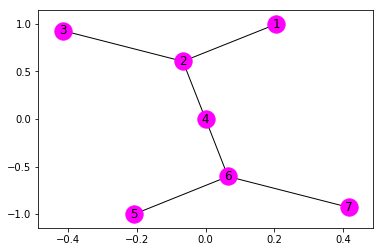

In [25]:
### GRADED
## Build a graph with networkx to 
## represent the tree above.
## Save your graph to ans_7 below.

tree = {
     '4': ['2', '6'],
     '2': ['1', '3'],
     '6': ['5', '7']
}
ans_7 = nx.from_dict_of_lists(tree)
print('Is ans_7 a tree: {}'.format(nx.is_tree(ans_7)))
nx.draw_networkx(ans_7, node_color='magenta')

In [26]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id="q08"></a>
[Return to top](#questions)

### Question 08: Using Trees for Mathematical Formulas

One application of a simple binary tree is for representing mathematical expressions or formulas. For example, let's consider the arithmetic expression

$$9\times(2+3)+7.$$

In [27]:
### GRADED
### QUESTION 08
### What is the numerical value of the expression above when evaluated?
###   Save your answer as ans_8 below.
ans_8 = 52
# Verification:
print('The numerical value of the expression "9*(2+3)+7" is {}.'.format(ans_8))

The numerical value of the expression "9*(2+3)+7" is 52.


In [28]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


The formula $9\times(2+3)+7$ is associated with a particular *expression tree* with nodes labelled with the arithmetic operators and operands (numbers or algebraic variables):

![](./resource/asnlib/publicdata/expr_tree_1.png)

When calculators or computer programs parse formulas like this, an expression tree is built up to carry out the computation. Notice this expression tree is in fact a *binary* tree (i.e., one with at most two outgoing edges from each node) and it is a *directed acyclic graph (DAG)*: it is not only a tree (an acyclic graph) but also the edges are directional. Notice also that the leaves of the tree (the nodes without any outgoing edges) have numerical values as labels; the internal nodes labeled with operators have a left child and a right child corresponding to the operands of the binary operators (which may be another subtree or a leaf).

Here is a standard implementation of a binary tree as a class `Tree`. This example makes use of standard Python object-oriented program idioms to define functions for the standard *magic methods* `__init__`, `__str__`, & `__repr__` (see the [Python tutorial](https://docs.python.org/3.7/tutorial/classes.html) for further explanation).

In [29]:
class Tree:
    'A simple implementation of a binary tree'
    def __init__(self, val, left_child = None, right_child = None):
        self.val = val
        self.left = left_child
        self.right = right_child
    def __str__(self):
        if self.left is None and self.right is None:
            return '%s(%s)' % (self.__class__.__name__, str(self.val))
        else:
            return '%s(%s, %s, %s)' % (self.__class__.__name__, self.val, self.left, self.right)
    def __repr__(self):
        if self.left is None and self.right is None:
            return '%s(%s)' % (self.__class__.__name__, repr(self.val))
        else:
            return '%s(%r, %r, %r)' % (self.__class__.__name__, self.val, self.left, self.right)

Notice:

+ We essentially are defining a node and its children which themselves can be trees.
+ The edges are in principle *directed* in this definition of a `Tree` class because edges connect *parent* nodes to their *left* and *right* *children*.
+ The `val` attribute is some kind of data or object associated with each node. It does not need to be unique, i.e., numerous nodes can have the same `val` attribute.

With the preceding class definition, the expression tree for the formula $9\times(2+3)+7$ is encoded as an object as follows:

In [30]:
# Encoding 9*(2+3)+7 with the Tree class
expr_tree = Tree('+', Tree('*', Tree(9), Tree('+', Tree(2), Tree(3))), Tree(7))
expr_tree

Tree('+', Tree('*', Tree(9), Tree('+', Tree(2), Tree(3))), Tree(7))

<a id="q09"></a>
[Return to top](#questions)

### Question 09: Using a `Tree` class

Your task is to express a different arithmetic formula, namely $$3+((4\times5)-(9+6)),$$ as an expression tree using the `Tree` class. The resulting tree, when visualized, looks like this:

![](./resource/asnlib/publicdata/expr_tree_2.png)

+ Use the `Tree` class to express the formula $3+((4\times5)-(9+6))$ as a (nested) `Tree` object.
+ Use Python strings for the arithmetic operators (with `'*'` for multiplication and `'/'` for division) and integers for the operands.
+ You can ignore the parentheses (other than to help determine the order of operations for binding operands to operators).
+ Assign the result to `ans_9`.

In [31]:
### GRADED
### QUESTION 09
### Use the Tree class above to build the given expression tree for the formula
###    3 + ((4*5)-(9+6))
### with Python strings for the operators & integers for the operands.
### Save your tree to ans_9 below.

new_tree = Tree('+', Tree(3), Tree('-', Tree('*', Tree(4), Tree(5)), Tree('+', Tree(9), Tree(6))))
ans_9 = new_tree


In [32]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


# Tree Traversals

In this next questions, you'll explore [tree traversal](https://en.wikipedia.org/wiki/Tree_traversal), the problem of visiting each & every node in a tree (usually to operate on some data associated with the nodes) exactly once under constraints imposed by the edges (i.e., that you must traverse from one node to one of its neighbors).

You can try this out with the `Tree` class representations of expression trees from the preceding question (which is what is involved in numerically evaluating the expression).  As an example, the function `print_tree` below prints the nodes of an expression tree by first printing its `val` attribute, then recursively traversing its *left* branch, and then recursively traversing its *right* branch.

In [33]:
def print_tree(tree):
    "Process Tree to print node values"
    if tree is None: return
    print(tree.val)
    print_tree(tree.left)
    print_tree(tree.right)

In [34]:
tree = Tree('+', Tree(1), Tree('*', Tree(2), Tree(3)))
print('The original representation: {}\n\nThe "pre-order" traversal:'.format(tree))
print_tree(tree)

The original representation: Tree(+, Tree(1), Tree(*, Tree(2), Tree(3)))

The "pre-order" traversal:
+
1
*
2
3


In [35]:
# Try again using the expression tree for 9*(2+3)+7
print('The original representation: {}\n\nThe "pre-order" traversal:'.format(expr_tree))
print_tree(expr_tree)

The original representation: Tree(+, Tree(*, Tree(9), Tree(+, Tree(2), Tree(3))), Tree(7))

The "pre-order" traversal:
+
*
9
+
2
3
7


<a id="q10"></a>
[Return to top](#questions)

### Question 10: Traversing a Tree using In-order Traversal

The preceding function `print_tree` first prints the `val` attribute of a node, then visits the left child and the right child, printing their corresponding branches (sometimes called the [pre-order traversal](https://en.wikipedia.org/wiki/Tree_traversal#Pre-order_(NLR))). You can adjust this [tree traversal](https://en.wikipedia.org/wiki/Tree_traversal) to display the tree node labels in a different sequence. For example, an [*in-order traversal*](https://en.wikipedia.org/wiki/Tree_traversal#In-order_(LNR)) would process the left branch first, the node itself, and then the right branch of the tree (in this case, just processing a node means printing its `val` attribute or doing nothing if the node is `None`). So, for the expression tree `tree = Tree('+', Tree(1), Tree('*', Tree(2), Tree(3)))` representing the formula $1+(2\times3)$, printing the node labels using an *in-order traversal* would yield

```
1
+
2
*
3
```

Your task, then, is to complete a function `print_tree_inorder` that displays the node labels for a binary expression tree using an in-order traversal.

+ Complete the function `print_tree_inorder` as required.
+ You can use the preceding function `print_tree` as a template.

Notice the function `print_tree` does not have a return value; it simply prints the node labels to standard output as a side effect.

In [36]:
### GRADED
### QUESTION 10
###  Complete the function below to produce an in-order traversal of a tree.
def print_tree_inorder(tree):
    "Process Tree to print node values using in-order traversal"
    if tree is None: return
    print_tree_inorder(tree.left)
    print(tree.val)
    print_tree_inorder(tree.right)

In [37]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


For the next explorations, you will start with a representation of a graph as a dictionary containing adjacency lists. As a reminder, you can construct and visualize a simple graph, and then use `networkx` to find paths in the graph.

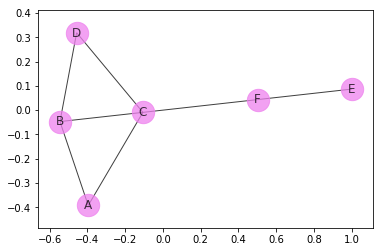

In [38]:
graph = {'A': ['B', 'C'],
             'B': ['C', 'D'],
             'C': ['D'],
             'D': ['C'],
             'E': ['F'],
             'F': ['C']}
graph_nx = nx.from_dict_of_lists(graph)
nx.draw_networkx(graph_nx, with_labels=True, node_color='violet', node_size=500, alpha=0.75)

### Finding paths

The `networkx` function `shortest_path` has the following signature (from the documentation):

```
nx.shortest_path(G, source=None, target=None, weight=None, method='dijkstra')

Parameters
----------
G : NetworkX graph

source : node, optional
    Starting node for path. If not specified, compute shortest
    paths for each possible starting node.

target : node, optional
    Ending node for path. If not specified, compute shortest
    paths to all possible nodes.

weight : None or string, optional (default = None)
    If None, every edge has weight/distance/cost 1.
    If a string, use this edge attribute as the edge weight.
    Any edge attribute not present defaults to 1.
```

In particular, calling `nx.shortest_path(graph_nx)` yields the following output:

In [39]:
nx.shortest_path(graph_nx)

{'A': {'A': ['A'],
  'B': ['A', 'B'],
  'C': ['A', 'C'],
  'D': ['A', 'B', 'D'],
  'F': ['A', 'C', 'F'],
  'E': ['A', 'C', 'F', 'E']},
 'B': {'B': ['B'],
  'A': ['B', 'A'],
  'C': ['B', 'C'],
  'D': ['B', 'D'],
  'F': ['B', 'C', 'F'],
  'E': ['B', 'C', 'F', 'E']},
 'C': {'C': ['C'],
  'A': ['C', 'A'],
  'B': ['C', 'B'],
  'D': ['C', 'D'],
  'F': ['C', 'F'],
  'E': ['C', 'F', 'E']},
 'D': {'D': ['D'],
  'B': ['D', 'B'],
  'C': ['D', 'C'],
  'A': ['D', 'B', 'A'],
  'F': ['D', 'C', 'F'],
  'E': ['D', 'C', 'F', 'E']},
 'E': {'E': ['E'],
  'F': ['E', 'F'],
  'C': ['E', 'F', 'C'],
  'A': ['E', 'F', 'C', 'A'],
  'B': ['E', 'F', 'C', 'B'],
  'D': ['E', 'F', 'C', 'D']},
 'F': {'F': ['F'],
  'E': ['F', 'E'],
  'C': ['F', 'C'],
  'A': ['F', 'C', 'A'],
  'B': ['F', 'C', 'B'],
  'D': ['F', 'C', 'D']}}

<a id="q11"></a>
[Return to top](#questions)

### Question 11: Finding paths between all vertices with `shortest_path`

Use the preceding output from `nx.shortest_path(graph_nx)` to identify two particular shortest paths:
one from node `D` to node `A` & one from node `B` to node `E`.
* Assign the results to `ans_11a` and `ans_11b` respectively.
* Represent both paths as lists of strings (i.e., the vertex labels).
* Include the initial and terminal vertices in the lists representing paths (so, e.g., a path specified by 4 vertex labels comprises 3 edges).

In [40]:
### GRADED
### QUESTION 11
### For the graph graph_nx from above, identify:
###    a shortest path from node D to node A (as ans_11a)
###    a shortest path from node B to node E (as ans_11b)
### Use lists of strings to represent both paths.
### Include starting & ending vertices in the lists.
### YOUR SOLUTION HERE:
first = nx.shortest_path(graph_nx, 'D', 'A')
second = nx.shortest_path(graph_nx, 'B', 'E')
ans_11a = first
ans_11b = second
# To verify solutions:
print('A shortest path from node D to node A: {}'.format(ans_11a))
print('A shortest path from node B to node E: {}'.format(ans_11b))

A shortest path from node D to node A: ['D', 'B', 'A']
A shortest path from node B to node E: ['B', 'C', 'F', 'E']


In [41]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Uninformed Search Algorithms

Now that you have some vocabulary and tools for working with graphs and trees, you can examine some basic approaches to **uninformed search** algorithms.  The main problem involves finding a path&mdash;a sequence of vertices connected by edges&mdash;from one vertex in a graph to another. In some circumstances, a shortest path may be desirable, but for the moment consider the problem of simply determining whether a connecting path between two distinct vertices exists at all.

The qualifier "uninformed" refers to the fact that, while looking through the graph for a path, the only information available is the adjacency lists of nodes explored so far. Later, you will work with *informed* search in which other information (e.g., geographic distance between cities in a geographical path-finding application) is available beyond adjacency. With informed search, the sequence in which adjacent nodes are chosen differs due to the additional information which can improve search performance.

### Depth-First Search (DFS)

[Depth-First Search (DFS)](https://en.wikipedia.org/wiki/Depth-first_search) is a strategy for traversing or searching through a graph or a tree. The traversal/search begins at a prescribed vertex (called the *root*) and, 
after choosing a vertex adjacent to the root, exploration proceeds down each branch before backtracking. That is, DFS favors visiting undiscovered vertices sooner so the resulting search trees tend to be deep.

It's likely easier to picture this using, for example, the animated GIF below (by [Steven Skeina](https://www3.cs.stonybrook.edu/~skiena/combinatorica/animations/search.html) using [Combinatorica](http://www.combinatorica.com/):

![](./resource/asnlib/publicdata/dfs_combinatorica.gif)

DFS produces a sequence of vertices (starting at the root) by which the graph can be traversed (i.e., each node visited, assuming that the graph is connected). If specified with an initial root node as well as a terminal node, DFS can then yield a *path* between any two vertices in a connected graph.

In the lectures, you were shown a pseudocode for DFS as below. The *goalTest* in practice, is often a terminal node or empty. In the former case, DFS can provide a path from the root to the terminal node (if possible); in the latter case, DFS provides a node sequence for traversing the entire graph (or at least the connected component containing the root).

---

__function__ DEPTH-FIRST-SEARCH(initialState, goalTest)<br>
&emsp;_returns_ __SUCCESS__ or __FAILURE__<br>
<br>
&emsp;frontier = Stack.new()<br>
&emsp;explored = Set.new()<br>
<br>
&emsp;__while__  __not__ frontier.isEmpty():<br>
&emsp;&emsp;state = frontier.pop()<br>
&emsp;&emsp;explored.add(state)<br>
<br>
&emsp;&emsp;__if__ goalTest(state):<br>
&emsp;&emsp;&emsp;__return__ __SUCCESS__(state)<br>
<br>
&emsp;&emsp;__for__ neighbor __in__ state.neighbors():<br>
&emsp;&emsp;&emsp;__if__ neighbor __not__ __in__ frontier $\cup$ explored:<br>
&emsp;&emsp;&emsp;&emsp;frontier.push(state)<br>
<br>
&emsp;__return__  __FAILURE__

DFS relies on a *stack* (sometimes called a *LIFO* for *Last-In-First-Out*) for maintaining the frontier. In Python, this is also easy to do with a list. To remove an item from the top of the stack `frontier`, simply use invoke the method `frontier.pop()`.

The Python function `dfs` as implemented here (adapted from a post by [Edd Mann](https://eddmann.com/posts/depth-first-search-and-breadth-first-search-in-python/)) captures the essence of the preceding pseudocode with some differences:

+ `explored` is implemented using a Python `list` rather than a `set` (so we can preserve the order in which nodes are visited).
+ the value returned is the `list` `explored` (rather than **SUCCESS** or **FAILURE**).

In [42]:
def dfs(graph, initial):
    explored, stack = list(), [initial]  # stack == frontier
    while stack:
        state = stack.pop()
        if state not in explored:
            explored.append(state)
            stack.extend([neighbor for neighbor in graph[state]
                          if not ((neighbor in stack) or (neighbor in explored))])
    return explored

You can see how the function `dfs` works on this example graph (represented as a `dict` of `list`s).

In [43]:
graph_dict = {'A': (['B', 'C']),
         'B': (['A', 'D', 'E']),
         'C': (['A', 'F']),
         'D': (['B']),
         'E': (['B', 'F']),
         'F': (['C', 'E'])}
print("A DFS traversal starting from 'A': {}".format(dfs(graph_dict, 'A')))
print("A DFS traversal starting from 'E': {}".format(dfs(graph_dict, 'E')))

A DFS traversal starting from 'A': ['A', 'C', 'F', 'E', 'B', 'D']
A DFS traversal starting from 'E': ['E', 'F', 'C', 'A', 'B', 'D']


The preceding function `dfs` can be tweaked to yield a recursive implementation to generate all possible paths between the initial and terminal vertex. A Python generator function (i.e., that uses `yield` instead of `return`) can construct all the paths.

In [44]:
def dfs_paths(graph, initial, goal):
    stack = [(initial, [initial])]
    while stack:
        (state, path) = stack.pop()
        for neighbor in [v for v in graph[state] if not (v in path)]:
            if neighbor == goal:
                yield path + [neighbor]
            else:
                stack.append((neighbor, path + [neighbor]))

The default output of this implementation is a *generator* object. This has the advantage of using lazy evaluation (so as not to consume memory until required) but makes it difficult to examine. For small examples like this, it is okay to convert the generator to a list so you can examine it.

In [45]:
paths = dfs_paths(graph_dict,'A', 'D')
print('type(paths): {}'.format(type(paths)))
paths = list(paths) # Explicitly transform generator to a list
print("Paths from 'A' to 'D': {}".format(paths))

type(paths): <class 'generator'>
Paths from 'A' to 'D': [['A', 'C', 'F', 'E', 'B', 'D'], ['A', 'B', 'D']]


As a slightly larger and more compelling example, you can consider this Python `dict` describing cities of Romania connected by roads (as used extensively in Russell & Norvig's [*Artificial Intelligence: a Modern Approach*](http://aima.cs.berkeley.edu/):

In [46]:
romania_graph = {'Arad': ['Zerind', 'Sibiu', 'Timisoara'],
               'Bucharest': ['Urziceni', 'Pitesti', 'Giurgiu', 'Fagaras'],
               'Craiova': ['Drobeta', 'Rimnicu', 'Pitesti'],
               'Drobeta': ['Craiova', 'Mehadia'],
               'Eforie': ['Hirsova'],
               'Fagaras': ['Bucharest', 'Sibiu'],
               'Giurgiu': ['Bucharest'],
               'Hirsova': ['Eforie', 'Urziceni'],
               'Iasi': ['Vaslui', 'Neamt'],
               'Lugoj': ['Timisoara', 'Mehadia'],
               'Mehadia': ['Drobeta', 'Lugoj'],
               'Neamt': ['Iasi'],
               'Oradea': ['Zerind', 'Sibiu'],
               'Pitesti': ['Bucharest', 'Craiova', 'Rimnicu'],
               'Rimnicu': ['Craiova', 'Pitesti', 'Sibiu'],
               'Sibiu': ['Arad', 'Fagaras', 'Oradea', 'Rimnicu'],
               'Timisoara': ['Arad', 'Lugoj'],
               'Urziceni': ['Bucharest', 'Hirsova', 'Vaslui'],
               'Vaslui': ['Iasi', 'Urziceni'],
               'Zerind': ['Arad', 'Oradea']}

The above `dict` describes roads between Romanian cites as in the image below (without distances; later, you'll use the distances as well with *informed* search algorithms in the next assignment).
![](./resource/asnlib/publicdata/romania_map.png)

<a id="q12"></a>
[Return to top](#questions)

In [47]:

test = dfs(romania_graph, 'Giurgiu')

In [48]:
test

['Giurgiu',
 'Bucharest',
 'Fagaras',
 'Sibiu',
 'Rimnicu',
 'Craiova',
 'Drobeta',
 'Mehadia',
 'Lugoj',
 'Timisoara',
 'Oradea',
 'Zerind',
 'Arad',
 'Pitesti',
 'Urziceni',
 'Vaslui',
 'Iasi',
 'Neamt',
 'Hirsova',
 'Eforie']

### Question 12: Determining a Traversal using DFS

Use the Python implementation of Depth-First-Search `dfs` to determine the traversal order for the Romanian cities in `romania_graph` starting from `Giurgiu`.

+ Assign your answer (a Python list of strings) to `ans_12`.

In [49]:
### GRADED
### QUESTION 12
### What traversal order does DFS yield for romania_graph starting at 'Giurgiu'?
### Save your answer as ans_12
ans_12 = dfs(romania_graph, 'Giurgiu')
# Verifying solution
print("A DFS traversal starting from 'Giurgiu':\n{}".format(ans_12))

A DFS traversal starting from 'Giurgiu':
['Giurgiu', 'Bucharest', 'Fagaras', 'Sibiu', 'Rimnicu', 'Craiova', 'Drobeta', 'Mehadia', 'Lugoj', 'Timisoara', 'Oradea', 'Zerind', 'Arad', 'Pitesti', 'Urziceni', 'Vaslui', 'Iasi', 'Neamt', 'Hirsova', 'Eforie']


In [50]:
### BEGIN HIDDEN TEST
sol_12_ = dfs(romania_graph, 'Giurgiu')
#
#
assert ans_12 == sol_12_
### END HIDDEN TEST

<a id="q13"></a>
[Return to top](#questions)

### Question 13: Determining Paths using DFS

Use the Python function `dfs_paths` to determine all paths in the Romanian cities in `romania_graph` ending at `Sibiu` & starting from `Giurgiu`.

+ Provide your answer as a *list* (the default output of `dfs_paths` is a generator object, so you will have to explicitly convert it to a `list`).
+ Assign the resulting `list` to `ans_13`.

In [52]:
### GRADED
### QUESTION 13
### What simple paths does DFS find in romania_graph between 'Giurgiu' & 'Sibiu'?
### Save your answer as ans_13
test = dfs_paths(romania_graph, 'Giurgiu', 'Sibiu')
test = list(test)

ans_13 = test 
# Verifying solution
for path in ans_13:
    print(path)

['Giurgiu', 'Bucharest', 'Fagaras', 'Sibiu']
['Giurgiu', 'Bucharest', 'Pitesti', 'Rimnicu', 'Sibiu']
['Giurgiu', 'Bucharest', 'Pitesti', 'Rimnicu', 'Craiova', 'Drobeta', 'Mehadia', 'Lugoj', 'Timisoara', 'Arad', 'Sibiu']
['Giurgiu', 'Bucharest', 'Pitesti', 'Rimnicu', 'Craiova', 'Drobeta', 'Mehadia', 'Lugoj', 'Timisoara', 'Arad', 'Zerind', 'Oradea', 'Sibiu']
['Giurgiu', 'Bucharest', 'Pitesti', 'Craiova', 'Rimnicu', 'Sibiu']
['Giurgiu', 'Bucharest', 'Pitesti', 'Craiova', 'Drobeta', 'Mehadia', 'Lugoj', 'Timisoara', 'Arad', 'Sibiu']
['Giurgiu', 'Bucharest', 'Pitesti', 'Craiova', 'Drobeta', 'Mehadia', 'Lugoj', 'Timisoara', 'Arad', 'Zerind', 'Oradea', 'Sibiu']


In [ ]:
### BEGIN HIDDEN TEST
sol_13_ = list(dfs_paths(romania_graph, 'Giurgiu', 'Sibiu'))
path0_ = sol_13_[0]
#
#
assert len(ans_13) == len(sol_13_), "Incorrect number of paths found"
for path in ans_13:
    assert path[0] == path0_[0], "Path has incorrect initial node"
    assert path[-1] == path0_[-1], "Path has incorrect terminal node"
    assert path in sol_13_, "Incorrect path found"
### END HIDDEN TEST

### Breadth-First Search (BFS)

[Breadth-First Search (BFS)](https://en.wikipedia.org/wiki/Breadth-first_search) is an alternative strategy to DFS for traversing or searching through a graph. Again, the traversal/search begins at a prescribed *root* vertex; this time, it examines each of its neighbors, and then each of those neighbors, and so on. Intuitively, BFS radiates out from the root to visit vertices in order of their distance from the root (as measured by number of edges). Thus, vertices that are closer to the initial vertex get visited first.

![](./resource/asnlib/publicdata/bfs_combinatorica.gif)

As with DFS, BFS can produce a sequence of vertices (starting at the root) by which the graph can be traversed (i.e., each node visited, assuming that the graph is connected). If specified with an initial root node as well as a terminal node, BFS can then yield a *path* between the two vertices.

Here is a pseudocode for BFS as from the lectures:

---

__function__ BREADTH-FIRST-SEARCH(initialState, goalTest)<br>
&emsp;_returns_ __SUCCESS__ or __FAILURE__<br>
<br>
&emsp;frontier = Queue.new(initialState)<br>
&emsp;explored = Set.new()<br>
<br>
&emsp;__while__  __not__ frontier.isEmpty():<br>
&emsp;&emsp;state = frontier.dequeue()<br>
&emsp;&emsp;explored.add(state)<br>
<br>
&emsp;&emsp;__if__ goalTest(state):<br>
&emsp;&emsp;&emsp;__return__ __SUCCESS__(state)<br>
<br>
&emsp;&emsp;__for__ neighbor __in__ state.neighbors():<br>
&emsp;&emsp;&emsp;__if__ neighbor __not__ __in__ frontier $\cup$ explored:<br>
&emsp;&emsp;&emsp;&emsp;frontier.enqueue(state)<br>
<br>
&emsp;__return__  __FAILURE__

By contrast with DFS, BFS relies on a *queue* (sometimes called a *FIFO* for *First-In-First-Out*) for maintaining the frontier. In Python, this is also easy to do with a list. To remove an item from the front of the queue `frontier`, simply use invoke the method `frontier.pop(0)`.

The Python function `bfs` as implemented here captures the essence of the preceding pseudocode with some differences:

+ `explored` is implemented using a Python `list` rather than a `set` (so we can preserve the order in which nodes are visited).
+ the value returned is the `list` `explored` (rather than **SUCCESS** or **FAILURE**).

In [53]:
def bfs(graph, initial):
    explored, queue = list(), [initial]  # stack == frontier
    while queue:
        state = queue.pop(0)
        if state not in explored:
            explored.append(state)
            queue.extend([neighbor for neighbor in graph[state]
                          if not ((neighbor in queue) or (neighbor in explored))])
    return explored

Here's an example of using the function `bfs` on the same toy graph from before.

In [54]:
graph_dict = {'A': (['B', 'C']),
         'B': (['A', 'D', 'E']),
         'C': (['A', 'F']),
         'D': (['B']),
         'E': (['B', 'F']),
         'F': (['C', 'E'])}
print("A BFS traversal starting from 'A': {}".format(dfs(graph_dict, 'A')))
print("A BFS traversal starting from 'E': {}".format(dfs(graph_dict, 'E')))

A BFS traversal starting from 'A': ['A', 'C', 'F', 'E', 'B', 'D']
A BFS traversal starting from 'E': ['E', 'F', 'C', 'A', 'B', 'D']


As with DFS, BFS can construct paths from the initial to the terminal node by tweaking the implementation of `bfs` to yield a generator function `bfs_paths`. Notice that, with the breadth-first approach, BFS will identify shortest paths first (in the sense of fewest edges; they may not be shortest in a geographical sense).

In [55]:
def bfs_paths(graph, initial, goal):
    queue = [(initial, [initial])]
    while queue:
        (state, path) = queue.pop(0)
        for neighbor in [v for v in graph[state] if not (v in path)]:
            if neighbor == goal:
                yield path + [neighbor]
            else:
                queue.append((neighbor, path + [neighbor]))

Again, the default output of this implementation is a *generator* object so you'll convert the generator to a list for convenience (assuming the totality of paths is small enough to fit in memory easily.

In [56]:
paths = bfs_paths(graph_dict,'A', 'D')
print('type(paths): {}'.format(type(paths)))
paths = list(paths) # Explicitly transform generator to a list
print("BFS Paths from 'A' to 'D': {}".format(paths))

type(paths): <class 'generator'>
BFS Paths from 'A' to 'D': [['A', 'B', 'D'], ['A', 'C', 'F', 'E', 'B', 'D']]


Here is the map of the Romanian cities to assist you with Questions 14 & 15.
![](./resource/asnlib/publicdata/romania_map.png)

<a id="q14"></a>
[Return to top](#questions)

### Question 14: Determining a Traversal using BFS

Use the Python implementation of Breadth-First-Search `bfs` to determine the traversal order for the Romanian cities in `romania_graph` starting from `Giurgiu`.

+ Assign your answer (a Python list of strings) to `ans_14`.

In [57]:
### GRADED
### QUESTION 14
### What traversal order does DFS yield for romania_graph starting at 'Giurgiu'?
### Save your answer as ans_14

BFF = bfs(romania_graph, 'Giurgiu')
ans_14 = BFF
# Verifying solution
print("A BFS traversal starting from 'Giurgiu':\n{}".format(ans_14))

A BFS traversal starting from 'Giurgiu':
['Giurgiu', 'Bucharest', 'Urziceni', 'Pitesti', 'Fagaras', 'Hirsova', 'Vaslui', 'Craiova', 'Rimnicu', 'Sibiu', 'Eforie', 'Iasi', 'Drobeta', 'Arad', 'Oradea', 'Neamt', 'Mehadia', 'Zerind', 'Timisoara', 'Lugoj']


In [58]:
### BEGIN HIDDEN TEST
sol_14_ = bfs(romania_graph, 'Giurgiu')
#
#
assert ans_14 == sol_14_
### END HIDDEN TEST

<a id="q15"></a>
[Return to top](#questions)

### Question 15: Determining Paths using DFS

Use the Python function `bfs_paths` to determine all paths in the Romanian cities in `romania_graph` ending at `Sibiu` & starting from `Giurgiu`.

+ Provide your answer as a *list* (the default output of `bfs_paths` is a generator object, so you will have to explicitly convert it to a `list`).
+ Assign the resulting `list` to `ans_15`.

In [59]:
### GRADED
### QUESTION 15
### What simple paths does DFS find in romania_graph between 'Giurgiu' & 'Sibiu'?
### Save your answer as ans_15

BFF_paths = bfs_paths(romania_graph, 'Giurgiu', 'Sibiu')

ans_15 = list(BFF_paths)
# Verifying solution
for path in ans_15:
    print(path)

['Giurgiu', 'Bucharest', 'Fagaras', 'Sibiu']
['Giurgiu', 'Bucharest', 'Pitesti', 'Rimnicu', 'Sibiu']
['Giurgiu', 'Bucharest', 'Pitesti', 'Craiova', 'Rimnicu', 'Sibiu']
['Giurgiu', 'Bucharest', 'Pitesti', 'Craiova', 'Drobeta', 'Mehadia', 'Lugoj', 'Timisoara', 'Arad', 'Sibiu']
['Giurgiu', 'Bucharest', 'Pitesti', 'Rimnicu', 'Craiova', 'Drobeta', 'Mehadia', 'Lugoj', 'Timisoara', 'Arad', 'Sibiu']
['Giurgiu', 'Bucharest', 'Pitesti', 'Craiova', 'Drobeta', 'Mehadia', 'Lugoj', 'Timisoara', 'Arad', 'Zerind', 'Oradea', 'Sibiu']
['Giurgiu', 'Bucharest', 'Pitesti', 'Rimnicu', 'Craiova', 'Drobeta', 'Mehadia', 'Lugoj', 'Timisoara', 'Arad', 'Zerind', 'Oradea', 'Sibiu']


In [60]:
### BEGIN HIDDEN TEST
sol_15_ = list(bfs_paths(romania_graph, 'Giurgiu', 'Sibiu'))
path0_ = sol_15_[0]
#
#
assert len(ans_15) == len(sol_15_), "Incorrect number of paths found"
for path in ans_15:
    assert path[0] == path0_[0], "Path has incorrect initial node"
    assert path[-1] == path0_[-1], "Path has incorrect terminal node"
    assert path in sol_15_, "Incorrect path found"
### END HIDDEN TEST

## Graph Search Algorithms in `networkx`

The implementations of Depth-First-Search & Breadth-First-Search developed here are fairly simple. NetworkX provides implementations of numerous graph algorithms including DFS and BFS.

+ `dfs_edges` and `bfs_edges` produce the tree representation of the DFS & BFS traversals respectively
+ `dfs_tree` and `bfs_tree` produce the tree representation of the DFS & BFS traversals respectively
+ `dfs_successors` and `bfs_successors` produces a dict mapping nodes to lists of their successors of nodes starting from the root (using DFS & BFS respectively)


In [61]:
graph_dict = {'A': ['B', 'C'],
         'B': ['A', 'C', 'D'],
         'C': ['A', 'B', 'D', 'F'],
         'D': ['B', 'C'],
         'E': ['F'],
         'F': ['C', 'E']}

G = nx.from_dict_of_lists(graph_dict)

In [62]:
bfs(graph_dict, 'A')

['A', 'B', 'C', 'D', 'F', 'E']

In [63]:
# same result attained using networkx
edges = nx.bfs_edges(G, 'A')
nodes = ['A'] + [v for u, v in edges]
nodes

['A', 'B', 'C', 'D', 'F', 'E']

In [64]:
list(nx.bfs_successors(G, 'A')) # result of bfs_successors is a generator

[('A', ['B', 'C']), ('B', ['D']), ('C', ['F']), ('F', ['E'])]

<a id="q16"></a>
[Return to top](#questions)

### Question 16: Using `networkx` for DFS and BFS

For this question, you'll work with the `networkx` representation of `romania_graph` (created for you here as `G_romania`).

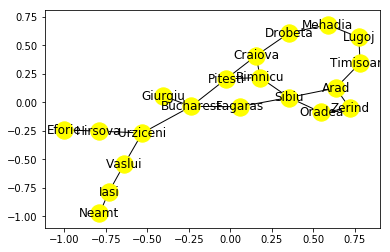

In [65]:
G_romania = nx.from_dict_of_lists(romania_graph)
nx.draw_networkx(G_romania, with_labels=True, node_color='yellow')

Use the `networkx` functions `dfs_successors` & `bfs_successors` to determine two `dict`s mapping nodes to lists of their successors as found in a depth-first & a breadth-first traversal (respectively) starting from `Sibiu`.

+ Assign the result of the DFS traversal to ans_16_dfs.
+ Assign the result of the BFS traversal to ans_16_bfs.
+ Make sure both results are `dict`s (you may have to explicitly cast them if the function returns a generator).

In [67]:
test = nx.bfs_successors(G_romania, 'Giurgiu')

In [69]:
hm = dict(test)

In [71]:
### GRADED
### QUESTION 16
### Save dicts to ans_16_dfs & ans_16_bfs that match vertices to their successors found in
### a DFS or BFS traversal (respectively) initiated at 'Sibiu' in romania_graph
### YOUR ANSWER HERE

bfs_test = dict(nx.bfs_successors(G_romania, 'Sibiu'))
dfs_test = dict(nx.dfs_successors(G_romania, 'Sibiu'))

ans_16_dfs = dfs_test
ans_16_bfs = bfs_test
# For verification
from pprint import pprint 
print('DFS successors:')
pprint(ans_16_dfs)
print('\nBFS successors:')
pprint(ans_16_bfs)

DFS successors:
{'Arad': ['Zerind', 'Timisoara'],
 'Bucharest': ['Urziceni', 'Giurgiu', 'Fagaras'],
 'Craiova': ['Rimnicu'],
 'Drobeta': ['Craiova'],
 'Hirsova': ['Eforie'],
 'Iasi': ['Neamt'],
 'Lugoj': ['Mehadia'],
 'Mehadia': ['Drobeta'],
 'Pitesti': ['Bucharest'],
 'Rimnicu': ['Pitesti'],
 'Sibiu': ['Arad'],
 'Timisoara': ['Lugoj'],
 'Urziceni': ['Hirsova', 'Vaslui'],
 'Vaslui': ['Iasi'],
 'Zerind': ['Oradea']}

BFS successors:
{'Arad': ['Zerind', 'Timisoara'],
 'Bucharest': ['Urziceni', 'Giurgiu'],
 'Craiova': ['Drobeta'],
 'Fagaras': ['Bucharest'],
 'Hirsova': ['Eforie'],
 'Iasi': ['Neamt'],
 'Lugoj': ['Mehadia'],
 'Rimnicu': ['Craiova', 'Pitesti'],
 'Sibiu': ['Arad', 'Fagaras', 'Oradea', 'Rimnicu'],
 'Timisoara': ['Lugoj'],
 'Urziceni': ['Hirsova', 'Vaslui'],
 'Vaslui': ['Iasi']}


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
